In [1]:
## 210962012 Abhishek Kudwa

## q1

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import random

In [31]:
df = pd.read_csv('gold_rate.csv')

In [32]:
df.rename(columns={'Year':'X','Price (24 karat per 10 grams)':'Y'},inplace = True)

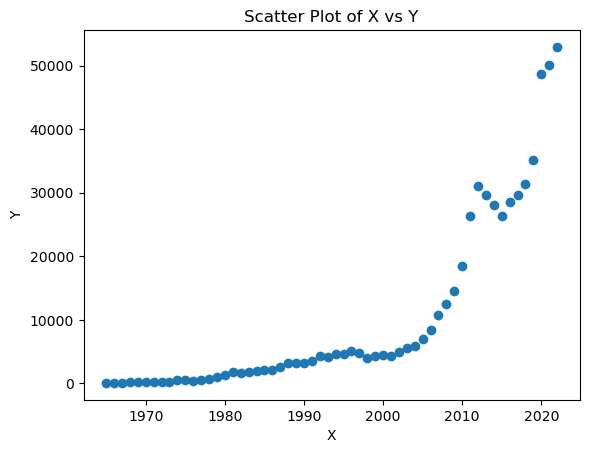

In [33]:
plt.scatter(df['X'], df['Y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of X vs Y')
plt.show()

In [34]:
X = df[['X']]
y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

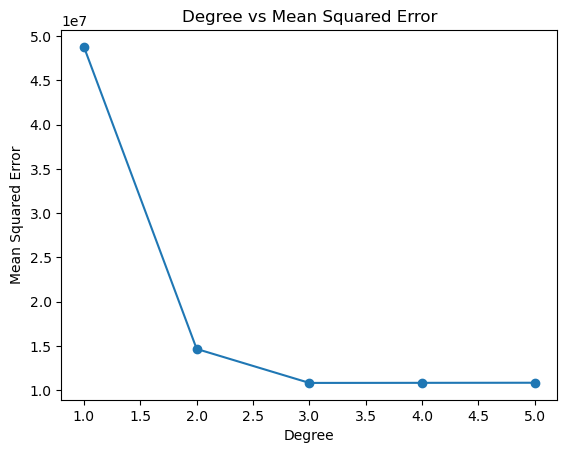

In [35]:
degrees = [1, 2, 3, 4, 5]
mse_results = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    X_test_poly = poly_features.transform(X_test)
    y_pred = model.predict(X_test_poly)
    
    mse = mean_squared_error(y_test, y_pred)
    mse_results.append(mse)
    
# Plot the MSE for each degree
plt.plot(degrees, mse_results, marker='o')
plt.xlabel('Degree')
plt.ylabel('Mean Squared Error')
plt.title('Degree vs Mean Squared Error')
plt.show()

Best degree: 3


/home/student/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


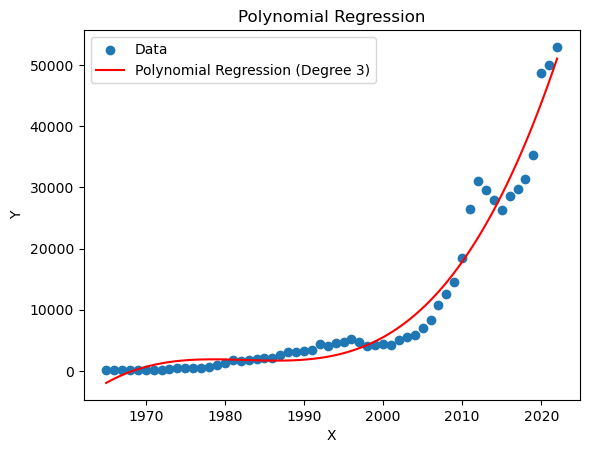

In [36]:
# Select the best degree
best_degree = degrees[np.argmin(mse_results)]
print(f"Best degree: {best_degree}")

# Fit the final model using the best degree
final_poly_features = PolynomialFeatures(degree=best_degree)
X_poly = final_poly_features.fit_transform(X)
final_model = LinearRegression()
final_model.fit(X_poly, y)

# Visualize the final model
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = final_poly_features.transform(X_range)
y_pred_final = final_model.predict(X_range_poly)

plt.scatter(X, y, label='Data')
plt.plot(X_range, y_pred_final, color='red', label=f'Polynomial Regression (Degree {best_degree})')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Polynomial Regression')
plt.show()

# q 2

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
df2 = pd.read_csv('gold_rate.csv')
df2.rename(columns = {'Year':'X','Price (24 karat per 10 grams)':'Y'},inplace = True)

In [42]:
random_classes = [random.randint(0, 1) for _ in range(len(df2))]
df2['Class'] = random_classes

In [44]:
# Split the dataset into training and testing sets
X = df2[['X']]
y = df2['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Make predictions on the test set
y_pred = model.predict(X_test)

In [49]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5833333333333334


# q3

In [50]:
df3 = pd.read_csv('gold_silver.csv')

In [51]:
df3.rename(columns = {'Silver Rates':'X1','Gold Rates':'X2','Year':'Y'},inplace = True)

In [52]:
X = df3[['X1', 'X2']].values
Y = df3['Y'].values

In [53]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [54]:
# Create polynomial features
degree = 2  # Degree of the polynomial
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [55]:
# Fit a linear regression model on the polynomial features
model = LinearRegression()
model.fit(X_train_poly, Y_train)

LinearRegression()

In [56]:
# Predict on the test data
Y_pred = model.predict(X_test_poly)

In [57]:
# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 9.849684772545752


# q 4

In [64]:
df4 = pd.read_csv('gold_silver.csv')

In [65]:
random_classes = [random.randint(0,1) for _ in range(len(df4))]
df4['Class'] = random_classes

In [68]:
df4.rename(columns = {'Gold Rates':'X1','Silver Rates':'X2','Class':'Y'},inplace=True)

In [69]:
X = df4[['X1', 'X2']].values
Y = df4['Y'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [70]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [71]:
# Make predictions on the test data
Y_pred = model.predict(X_test)

In [73]:
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)

In [74]:
accuracy

0.3333333333333333